<h1> Speed Classification </h1>

In [37]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, RocCurveDisplay, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


In [38]:
path ="../IDMT-Traffic/datasets/df_main_encoded_only.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0", "file", "is_background_encoded"], inplace=True)

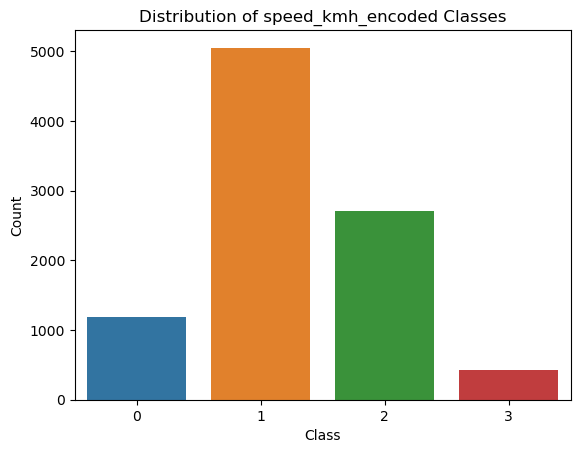

speed_kmh_encoded
1    5054
2    2704
0    1183
3     420
Name: count, dtype: int64


In [39]:
X = df.drop(columns=["speed_kmh_encoded"])
y = df["speed_kmh_encoded"]

sns.countplot(x=y)
plt.title('Distribution of speed_kmh_encoded Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

print(y.value_counts())

In [44]:
# Assuming X and y are already defined
scaler = MinMaxScaler() 

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=44, test_size=0.2)


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)

model = LogisticRegression(multi_class="multinomial",  solver="lbfgs", max_iter=500, class_weight='balanced')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       223
           1       1.00      1.00      1.00      1025
           2       1.00      1.00      1.00       545
           3       0.99      1.00      0.99        80

    accuracy                           1.00      1873
   macro avg       1.00      1.00      1.00      1873
weighted avg       1.00      1.00      1.00      1873



In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE

# Assuming X and y are already defined

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=44, test_size=0.2)

# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)

# Logistic Regression with hyperparameter tuning
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga', 'saga+'],
    'max_iter': [100, 500, 1000]
}

log_reg = LogisticRegression(multi_class="multinomial")
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Model with best parameters
best_model = grid_search.best_estimator_

# Feature Selection using RFE
rfe = RFE(estimator=best_model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Fitting model on selected features
best_model.fit(X_train_rfe, y_train)
y_pred = best_model.predict(X_test_rfe)

# Classification Report
print(classification_report(y_test, y_pred))


/Users/janikwahrheit/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/janikwahrheit/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/janikwahrheit/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/janikwahrheit/anaconda3/lib/python3.11/site-packages/sklearn/linear_mode

Best parameters found:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


/Users/janikwahrheit/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/janikwahrheit/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/janikwahrheit/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/janikwahrheit/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/janikwahrheit/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/janikwahrheit/anac

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       223
           1       1.00      1.00      1.00      1025
           2       1.00      1.00      1.00       545
           3       1.00      1.00      1.00        80

    accuracy                           1.00      1873
   macro avg       1.00      1.00      1.00      1873
weighted avg       1.00      1.00      1.00      1873



/Users/janikwahrheit/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [47]:
print(X_train_rfe)

[[-0.02492498  0.01466138  1.19006862 ...  2.14009531  0.97789237
   1.28233866]
 [ 0.95428931  0.01466138 -0.84028768 ... -0.11247355 -0.43082424
   0.79747582]
 [ 0.36676074  0.01466138 -0.84028768 ...  0.09098401  0.66375866
  -0.20138359]
 ...
 [ 2.12934645 -1.07231277  1.19006862 ... -2.19328545 -2.31100096
  -2.46580858]
 [ 1.73766074 -1.07231277  1.19006862 ... -1.78942696 -2.25461346
  -2.25823874]
 [ 1.77061627 -1.07231277  1.19006862 ... -0.87876753 -1.43942192
  -1.88211249]]
